<a href="https://colab.research.google.com/github/yasolar/pos_inteligencia_artificial/blob/main/Trabalho_Final_Redes_Neurais_e_Sistema_Especialista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OpinaEmpresa**

###Trabalho final das aulas de Redes Neurais e Sistemas Especialistas da pós-graduação em Inteligência Artificial


Aluna: **Yasmin Araújo**

Linkedin: https://www.linkedin.com/in/yasmin-araujo-58883276/

Github: https://github.com/yasolar



# **Instalação**

In [1]:
!pip install googletrans==4.0.0-rc1
!pip install matplotlib
!pip install wordcloud
!pip install nltk

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 617.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=56dd3df00ea62df057f929f567e35f25a07e36ceb99f4421ecaa3ea7b4233aba
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

# **Importação**

In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from googletrans import Translator
from google.colab import drive
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json

# **Preparação do ambiente**

In [3]:
drive.mount('/content/drive')
nltk.download('vader_lexicon')
nltk.download('stopwords')
sid = SentimentIntensityAnalyzer()
translator = Translator()
stop_words_pt = set(stopwords.words('portuguese'))

Mounted at /content/drive


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Carregar empresas e opiniões**

In [4]:
#Comando para pegar as informações das empresas e opiniões sobre elas em um arquivo JSON
with open('/content/drive/My Drive/Estudos em geral/Pós - Inteligência Artificial/RN_SE - Trabalho Final/empresas_opinioes.json', 'r') as file:
  empsOpinioes = json.load(file)

# **Criar funções**

In [5]:
# Função para criar tratamento nas opiniões das empresas
def analisar_opinioes(frase):
    frase_ingles = translator.translate(frase, src='pt', dest='en').text
    score = sid.polarity_scores(frase_ingles)

    if score['compound'] >= 0.05:
        return 'positivo'
    elif score['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Função para desenhar as porcentagens em cada barra
def add_porcentagem_barra(ax, data):
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de offset vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Função para gerar e exibir o gráfico de barras de sentimentos
def exibir_grafico_sentimentos(porcentagens, empresa_escolhida):
    fig, ax = plt.subplots()
    bars = ax.bar(porcentagens.keys(), porcentagens.values(), color=['green', 'red', 'blue'])
    plt.xlabel('Sentimento')
    plt.ylabel('Porcentagem (%)')
    plt.title(f'Análise de Sentimento das Opiniões - {empresa_escolhida}')
    add_porcentagem_barra(ax, porcentagens)
    plt.show()

# Função para gerar e exibir a nuvem de palavras
def exibir_nuvem_palavras(todas_opinioes, empresa_escolhida):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words_pt).generate(todas_opinioes)
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras para {empresa_escolhida}')
    plt.show()

# **Visualizar opiniões e sentimentos de forma textual**

In [12]:
# Solicitar ao usuário que insira o nome da empresa
empresa_escolhida = input("Digite o nome da empresa para analisar as opiniões: ")

# Encontrar opiniões para a empresa escolhida
opinioes_encontradas = False
for opiniao in empsOpinioes:
    if opiniao['empresa'].lower() == empresa_escolhida.lower():
        opinioes_encontradas = True
        for i, frase in enumerate(opiniao['opinioes'], 1):
            sentimento = analisar_opinioes(frase)
            print(f"Frase {i} da empresa {opiniao['empresa']}: '{frase}' - Sentimento: {sentimento}")

if not opinioes_encontradas:
    print("Empresa não encontrada ou sem opiniões.")

Digite o nome da empresa para analisar as opiniões: Cosan
Frase 1 da empresa Cosan: 'A Cosan está em uma posição interessante no mercado de energia e logística.' - Sentimento: positivo
Frase 2 da empresa Cosan: 'Oportunidades de carreira são limitadas e a gestão poderia ser mais dinâmica.' - Sentimento: positivo
Frase 3 da empresa Cosan: 'A empresa tem um bom plano de carreira e incentiva o desenvolvimento profissional.' - Sentimento: positivo
Frase 4 da empresa Cosan: 'A localização do escritório é conveniente, embora as instalações sejam antigas.' - Sentimento: neutro
Frase 5 da empresa Cosan: 'Há uma quantidade razoável de treinamento oferecido aos novos funcionários.' - Sentimento: neutro
Frase 6 da empresa Cosan: 'Os benefícios são ruins e são escassos em comparação com outras empresas do setor.' - Sentimento: negativo
Frase 7 da empresa Cosan: 'As tarefas diárias são rotineiras, sem muita variação ou desafio.' - Sentimento: positivo


# **Visualizar gráfico e nuvem de palavras**

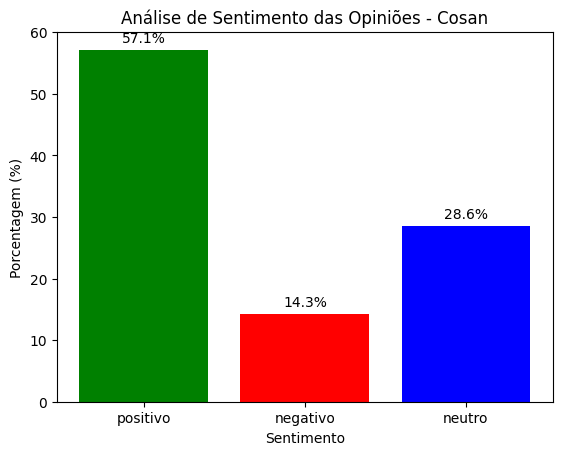

--


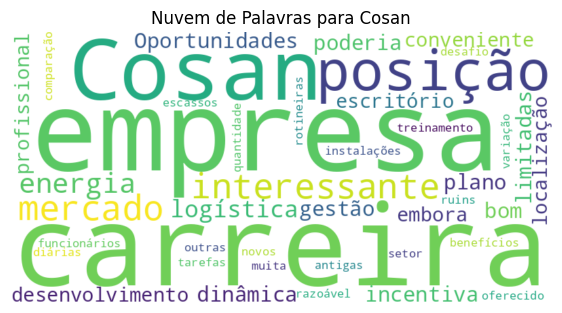

In [13]:
# Contadores para cada sentimento
sentimentos = {'positivo': 0, 'negativo': 0, 'neutro': 0}

# Encontrar opiniões para a empresa escolhida
opinioes_encontradas = False
for opiniao in empsOpinioes:
    if opiniao['empresa'].lower() == empresa_escolhida.lower():
        opinioes_encontradas = True
        for frase in opiniao['opinioes']:
            sentimento = analisar_opinioes(frase)
            sentimentos[sentimento] += 1

# Verificar se foram encontradas opiniões para a empresa escolhida
if not opinioes_encontradas:
    print("Empresa não encontrada ou sem opiniões.")
else:
    # Calcular porcentagens
    total_opinioes = sum(sentimentos.values())
    porcentagens = {k: (v / total_opinioes) * 100 for k, v in sentimentos.items()}

    # Exibir o gráfico de barras de sentimentos
    exibir_grafico_sentimentos(porcentagens, empresa_escolhida)

    print('--')

    # Preparar as opiniões para a nuvem de palavras
    todas_opinioes = ' '.join([frase for opiniao in empsOpinioes if opiniao['empresa'].lower() == empresa_escolhida.lower() for frase in opiniao['opinioes']])
    todas_opinioes_sem_stopwords = ' '.join([palavra for palavra in todas_opinioes.split() if palavra.lower() not in stop_words_pt])

    # Exibir a nuvem de palavras
    exibir_nuvem_palavras(todas_opinioes_sem_stopwords, empresa_escolhida)